<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-MLD-Data" data-toc-modified-id="Read-MLD-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read MLD Data</a></span><ul class="toc-item"><li><span><a href="#Make-MLD-climatology" data-toc-modified-id="Make-MLD-climatology-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Make MLD climatology</a></span></li></ul></li></ul></div>

# Plot mixed layer depth  
BIOPERIANT12 vs Argo profiles  
Source: MLD_evaluation_MdP_16Oct19.ipynb  

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import numpy as np
import xarray as xr

import cmocean.cm as cmo
from cartopy import crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

---

## Read MLD Data

Load monthly Argo profile and model data co-located on 1 degree grid

In [2]:
ds_mld= xr.open_dataset(f'../data/MLD/BP12_OBS_monthly_mld.nc')

Cut to model domain

In [3]:
latidx_of_data1 = np.min(np.where(~np.isnan(np.nanmean(ds_mld.mld_mdl[0,:,:].values, axis=1))))
latidx_of_data2 = np.max(np.where(~np.isnan(np.nanmean(ds_mld.mld_mdl[0,:,:].values, axis=1))))
ds_mld = ds_mld.isel(lat=slice(latidx_of_data1, latidx_of_data2))

### Make MLD climatology

In [4]:
mld_obs_clim, mld_mdl_clim = [], []

for i in range(1, 12+1):
    x = ds_mld.sel(time=ds_mld['time.month']==i)
    mld_obs_clim += np.nanmean(x.mld_obs, axis=0),
    mld_mdl_clim += np.nanmean(x.mld_mdl_subsampled, axis=0),
    
mld_obs_clim = np.array(mld_obs_clim)
mld_mdl_clim = np.array(mld_mdl_clim)

# PLOT

In [5]:
# MLD colormap for Jan and Sep
cmap_mld = cmo.tools.crop_by_percent(cmo.rain, 15, which='both', N=None)  
norm_mld1 = colors.BoundaryNorm(np.arange(0,210,10), cmap_mld.N, extend='max')
norm_mld9 = colors.BoundaryNorm(np.arange(0,410,10), cmap_mld.N, extend='max')

# Difference plot
cmap_dmld = cmo.tools.crop_by_percent(cmo.balance, 15, which='both', N=None)  
norm_dmld = colors.BoundaryNorm(np.arange(-100,110,10), cmap_dmld.N, extend='both')

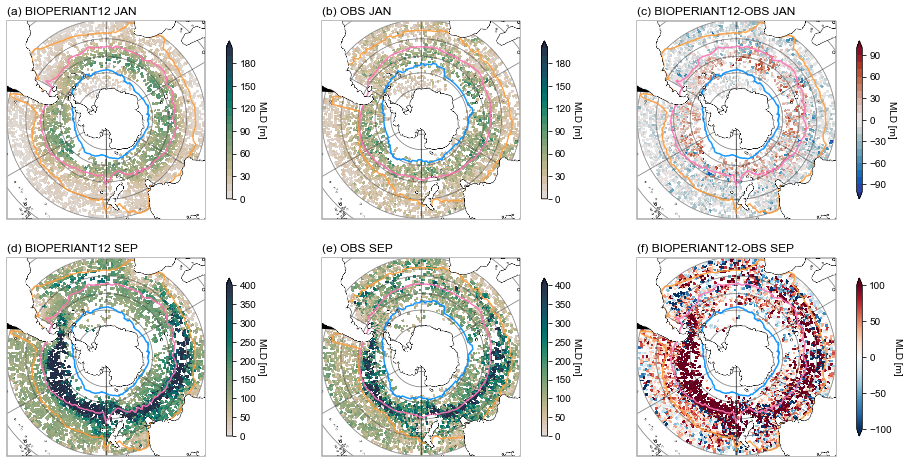

In [6]:
fig = plt.figure(figsize=(16, 8))

######### Row 1: JAN MLD for BP12, OBS, BP12-OBS  ###########

ax = fig.add_subplot(2, 3, 1, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(a) BIOPERIANT12 JAN',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_mdl_clim[0, :, :], 
                     cmap=cmap_mld, norm=norm_mld1,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='max')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"mdl")
pu.maps.map_decorator(ax)

ax = fig.add_subplot(2, 3, 2, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(b) OBS JAN',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_obs_clim[0, :, :],
                     cmap=cmap_mld, norm=norm_mld1,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='max')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"obs")
pu.maps.map_decorator(ax)

ax = fig.add_subplot(2, 3, 3, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(c) BIOPERIANT12-OBS JAN',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_mdl_clim[0, :, :]-mld_obs_clim[0, :, :], 
                     cmap=cmap_dmld, norm=norm_dmld,
                     transform=ccrs.PlateCarree(),zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"mdl")
pu.maps.map_decorator(ax)

### ------------------------------------ SEP MLD --------------------------------- ###
ax = fig.add_subplot(2, 3, 4, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(d) BIOPERIANT12 SEP',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_mdl_clim[8, :, :], 
                     cmap=cmap_mld, norm=norm_mld9,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='max')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"mdl")
pu.maps.map_decorator(ax)

ax = fig.add_subplot(2, 3, 5, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(e) OBS SEP',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_obs_clim[8, :, :], 
                      cmap=cmap_mld, norm=norm_mld9,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='max')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"obs")
pu.maps.map_decorator(ax)

ax = fig.add_subplot(2, 3, 6, projection = ccrs.Stereographic(central_latitude=-90), zorder=100)
plt.title('(f) BIOPERIANT12-OBS SEP',loc='left',fontsize=12)
mesh = ax.pcolormesh(ds_mld.lon, ds_mld.lat, mld_mdl_clim[8, :, :]-mld_obs_clim[8, :, :], cmap='RdBu_r',
                     transform=ccrs.PlateCarree(),zorder=0, vmin=-100, vmax=100)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label('MLD [m]', rotation=-90, labelpad=10)
pu.maps.add_biomes(ax,"mdl")
pu.maps.map_decorator(ax)

plt.tight_layout()
plt.savefig(f'../figures/Fig4a.png', bbox_inches='tight')
plt.savefig(f'../figures/Fig4a.eps', bbox_inches='tight')

# Calc domain-ave MLD

In [7]:
mld_obs_seasonal_cycle = np.nanmean(mld_obs_clim, axis=(1,2))
mld_mdl_seasonal_cycle = np.nanmean(mld_mdl_clim, axis=(1,2))

mld_obs_seasonal_cycle_std = np.nanstd(mld_obs_clim, axis=(1,2))
mld_mdl_seasonal_cycle_std = np.nanstd(mld_mdl_clim, axis=(1,2))

# rearrange to start in July
obs_mean = np.concatenate((mld_obs_seasonal_cycle[6:], mld_obs_seasonal_cycle[:6]))
mdl_mean = np.concatenate((mld_mdl_seasonal_cycle[6:], mld_mdl_seasonal_cycle[:6]))
obs_std  = np.concatenate((mld_obs_seasonal_cycle_std[6:], mld_obs_seasonal_cycle_std[:6]))
mdl_std  = np.concatenate((mld_mdl_seasonal_cycle_std[6:], mld_mdl_seasonal_cycle_std[:6]))

In [8]:
red, blue = pu.formatting.get_rbg_colors('r'), pu.formatting.get_rbg_colors('b')

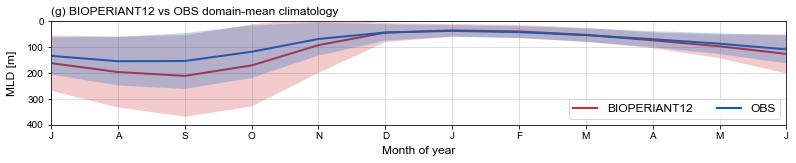

In [11]:
fig, axs = plt.subplots(4, 6, constrained_layout=True, figsize=(16, 8))
gs = axs[0, 0].get_subplotspec().get_gridspec()
[a.remove() for i in range(6) for a in axs[:, i]]
        
ax = fig.add_subplot(gs[:1, 1:5])
ax.plot(np.arange(12), mdl_mean, c=red, lw=2, label='BIOPERIANT12')
ax.plot(np.arange(12), obs_mean, c=blue, lw=2, label='OBS')
ax.fill_between(np.arange(12), mdl_mean+mdl_std, mdl_mean-mdl_std, alpha=0.25, zorder=20, facecolor="#cc2d35")
ax.fill_between(np.arange(12), obs_mean+obs_std, obs_mean-obs_std, alpha=0.25, zorder=20, facecolor="#0063c5")

ax.set_xlim(0, 11)
ax.xaxis.set_ticks(np.arange(12))
ax.xaxis.set_ticklabels(['J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M', 'J'])
ax.set_xlabel('Month of year', labelpad=5, fontsize=12)

ax.set_ylim(400, 0)
ax.yaxis.set_ticks(np.arange(0, 500, 100))
ax.set_ylabel('MLD [m]', labelpad=10, fontsize=12)

ax.grid(lw=1, c='0.75', alpha=0.5)
ax.legend(loc=4, ncol=2, fontsize=12)
ax.set_title('(g) BIOPERIANT12 vs OBS domain-mean climatology', loc='left', fontsize=12)
plt.tight_layout()
plt.savefig(f'../figures/Fig4b.png', bbox_inches='tight')

# Paste images together

In [10]:
from PIL import Image

In [12]:
im1 = Image.open(f'../figures/Fig4a.png')
im2 = Image.open(f'../figures/Fig4b.png')
im_final  = Image.new('RGB', (im1.width, im1.height+im2.height), (255, 255, 255))
offset = int((im1.width - im2.width)/4)
im_final.paste(im1,(0, 0))
im_final.paste(im2, (offset, im1.height))
im_final.show()
im_final.save(f'../figures/f04.png', bbox_inches='tight')